# Telecom Churn Case Study

# Importing required libraries

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [5]:
# Setting plot style to ggplot
plt.style.use('ggplot')

In [6]:
import numpy as np
import pandas as pd
import re
import pyodbc
import os
import time
import pickle
import logging
import pyarrow
import warnings
from calendar import monthrange
from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, accuracy_score,
    auc, log_loss, roc_auc_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

# Importing dataset

In [8]:
df = pd.read_csv("telecom_churn_data.csv")

# Data Understanding, Exploration & Cleaning

## Checking size of the dataset

In [9]:
df.shape

(99999, 227)

## Checking first few rows

In [10]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN

## Checking the summary statistics of the dataset

In [11]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Checking the data types and nullability of columns

In [12]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 227 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

### Handling date columns

In [13]:
date_var = df.select_dtypes(include='object').columns
date_var = [col for col in date_var if 'prod_holding' not in col]
date_var

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [14]:
for col in date_var:
    df[col] = pd.to_datetime(df[col])

In [15]:
df[date_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [16]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [17]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [18]:
null_data

,Count,Percentage
count_rech_2g_6,74846,74.846748
max_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
night_pck_user_6,74846,74.846748
arpu_2g_6,74846,74.846748
fb_user_6,74846,74.846748
total_rech_data_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748


In [19]:
round(df.isna().sum()/df.shape[0],2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.01
std_og_t2o_mou              0.01
loc_ic_t2o_mou              0.01
last_date_of_month_6        0.00
last_date_of_month_7        0.01
last_date_of_month_8        0.01
last_date_of_month_9        0.02
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.04
onnet_mou_7                 0.04
onnet_mou_8                 0.05
onnet_mou_9                 0.08
offnet_mou_6                0.04
offnet_mou_7                0.04
offnet_mou_8                0.05
offnet_mou_9                0.08
roam_ic_mou_6               0.04
roam_ic_mou_7               0.04
roam_ic_mou_8               0.05
roam_ic_mou_9               0.08
roam_og_mou_6               0.04
roam_og_mou_7               0.04
roam_og_mou_8               0.05
roam_og_mou_9               0.08
loc_og_t2t_mou_6            0.04
loc_og_t2t

### Check NULL values again

In [30]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [31]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_9,74077,74.077741
date_of_last_rech_data_8,73660,73.660737
loc_ic_t2m_mou_9,7745,7.745077
loc_og_t2c_mou_9,7745,7.745077
loc_og_mou_9,7745,7.745077
std_og_t2t_mou_9,7745,7.745077
std_og_t2m_mou_9,7745,7.745077
std_og_t2f_mou_9,7745,7.745077


### Drop columns with NULL values over 40%

In [32]:
null_data[ null_data['Percentage'] > 40].index

In [33]:
Dropping these columns from the dataframe `df`
df.drop(columns=null_data[ null_data['Percentage'] > 40].index, inplace=True)

In [34]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN

## Deriving Churn (target variable)

In [51]:
df_hv[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [52]:
df_hv['total_ic_og_mou_9'] = df_hv['total_ic_mou_9'] + df_hv['total_og_mou_9']

In [53]:
df_hv['vol_2g_3g_mb_9'] = df_hv['vol_2g_mb_9'] + df_hv['vol_3g_mb_9']

In [54]:
df_hv['churn'] = 0

In [55]:
df_hv.loc[(df_hv['total_ic_og_mou_9']==0) & (df_hv['vol_2g_3g_mb_9']==0), 'churn'] = 1

In [56]:
round(df_hv['churn'].value_counts(normalize=True)*100, 2)

0    89.81
1    10.19
Name: churn, dtype: float64

In [57]:
target = df_hv.loc[df_hv['churn'] == 1]
non_target = df_hv.loc[df_hv['churn'] == 0]
print(target.shape)
print(non_target.shape)

(10191, 235)
(89808, 235)


In [58]:
df_hv.shape

(99999, 235)

In [59]:
target = df_hv.loc[df_hv['churn'] == 1]
non_target = df_hv.loc[df_hv['churn'] == 0]
target.shape

(10191, 235)

In [61]:
target.shape

(10191, 235)

In [63]:
hv = df_hv.copy()

### aon_years

In [65]:
# Create "aon_years" column to see the age of customer in years
hv['aon_years'] = round(hv['aon']/365,0)
hv['aon_years'].head()

0    3.0
1    3.0
2    3.0
3    7.0
4    4.0
Name: aon_years, dtype: float64

In [66]:
# Drop "aon" column
# hv.drop("aon", axis=1, inplace=True)

# recency

In [67]:
hv['date_of_last_rech_6'].head(2)

0   2014-06-21
1   2014-06-29
Name: date_of_last_rech_6, dtype: datetime64[ns]

In [68]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for column in date_columns:
    hv[column] = pd.to_datetime(hv[column], errors='coerce')

hv['most_recent_date_calls'] = hv[date_columns].max(axis=1)
reference_date = pd.to_datetime('2014-09-01')
hv['days_gap_last_rech_calls'] = (hv['most_recent_date_calls'] - reference_date).dt.days.abs().where(~hv[date_columns].isnull().all(axis=1))
hv.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,

In [69]:
date_columns = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
for column in date_columns:
    hv[column] = pd.to_datetime(hv[column], errors='coerce')

hv['most_recent_date_inet'] = hv[date_columns].max(axis=1)
reference_date = pd.to_datetime('2014-09-01')
hv['days_gap_last_rech_inet'] = (hv['most_recent_date_inet'] - reference_date).dt.days.abs().where(~hv[date_columns].isnull().all(axis=1))
hv.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN

In [70]:
columns_to_check = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

def find_latest_month(row):
    for month in range(8, 5, -1):
        if row[f'total_og_mou_{month}'] > 0:
            return month
    return None

hv['latest_month_og_calls'] = hv.apply(find_latest_month, axis=1)
hv['month_gap_latest_og_calls'] = 9 - hv['latest_month_og_calls']
hv.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,Na

In [71]:
columns_to_check = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

def find_latest_month(row):
    for month in range(8, 5, -1):
        if row[f'total_ic_mou_{month}'] > 0:
            return month
    return None

hv['latest_month_ic_calls'] = hv.apply(find_latest_month, axis=1)
hv['month_gap_latest_ic_calls'] = 9 - hv['latest_month_ic_calls']
hv.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0

In [72]:
columns_to_check = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']

def find_latest_month(row):
    for month in range(8, 5, -1):
        if row[f'vol_2g_mb_{month}'] > 0:
            return month
    return None

hv['latest_month_inet_2g'] = hv.apply(find_latest_month, axis=1)

columns_to_check = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

def find_latest_month(row):
    for month in range(8, 5, -1):
        if row[f'vol_3g_mb_{month}'] > 0:
            return month
    return None

hv['latest_month_inet_3g'] = hv.apply(find_latest_month, axis=1)

hv['latest_month_inet_2g'] = pd.to_numeric(hv['latest_month_inet_2g'], errors='coerce')
hv['latest_month_inet_3g'] = pd.to_numeric(hv['latest_month_inet_3g'], errors='coerce')

hv['latest_month_inet'] = np.maximum(hv['latest_month_inet_2g'], hv['latest_month_inet_3g'])
hv['latest_month_inet'] = np.where(pd.isnull(hv['latest_month_inet_2g']) & pd.isnull(hv['latest_month_inet_3g']), np.nan, hv['latest_month_inet'])

hv['month_gap_latest_inet'] = 9 - hv['latest_month_inet']
hv.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00

# frequency

In [73]:
hv['total_og_mou'] = (hv['total_og_mou_6'] + hv['total_og_mou_7'] + hv['total_og_mou_8'])/3
hv['total_ic_mou'] = (hv['total_ic_mou_6'] + hv['total_ic_mou_7'] + hv['total_ic_mou_8'])/3
hv['vol_2g_mb'] = (hv['vol_2g_mb_6'] + hv['vol_2g_mb_7'] + hv['vol_2g_mb_8'])/3
hv['vol_3g_mb'] = (hv['vol_3g_mb_6'] + hv['vol_3g_mb_7'] + hv['vol_3g_mb_8'])/3

# monetary

In [75]:
hv['avg_arpu_calls'] = (hv['arpu_6'] + hv['arpu_7'] + hv['arpu_8'])/3
hv['avg_arpu_inet'] = (hv['arpu_3g_6'] + hv['arpu_3g_7'] + hv['arpu_3g_8'] + hv['arpu_2g_6'] + hv['arpu_2g_7'] + hv['arpu_2g_8'])/6

In [76]:
hv['month_gap_latest_inet'].max()

3.0

In [77]:
hv.shape

(99999, 254)

In [78]:
# hv_cp1 = hv.copy()

# used feature

Recency: days_gap_last_rech_calls, days_gap_last_rech_inet, month_gap_latest_inet, month_gap_latest_og_calls, month_gap_latest_ic_calls

Frequency: total_og_mou, total_ic_mou, vol_2g_mb, vol_3g_mb

Monetary: avg_arpu_calls, avg_arpu_inet

In [79]:
hv['days_gap_last_rech_calls_raw'] = hv['days_gap_last_rech_calls']
hv['days_gap_last_rech_inet_raw'] = hv['days_gap_last_rech_inet']
hv['month_gap_latest_inet_raw'] = hv['month_gap_latest_inet']
hv['month_gap_latest_og_calls_raw'] = hv['month_gap_latest_og_calls']
hv['month_gap_latest_ic_calls_raw'] = hv['month_gap_latest_ic_calls']

hv['total_og_mou_raw'] = hv['total_og_mou']
hv['total_ic_mou_raw'] = hv['total_ic_mou']
hv['vol_2g_mb_raw'] = hv['vol_2g_mb']
hv['vol_3g_mb_raw'] = hv['vol_3g_mb']

hv['avg_arpu_calls_raw'] = hv['avg_arpu_calls']
hv['avg_arpu_inet_raw'] = hv['avg_arpu_inet']

In [80]:
hv['days_gap_last_rech_calls'].fillna(122, inplace=True)
hv['days_gap_last_rech_inet'].fillna(122, inplace=True)
hv['month_gap_latest_inet'].fillna(4, inplace=True)
hv['month_gap_latest_og_calls'].fillna(4, inplace=True)
hv['month_gap_latest_ic_calls'].fillna(4, inplace=True)

hv['total_og_mou'].fillna(0, inplace=True)
hv['total_ic_mou'].fillna(0, inplace=True)
hv['vol_2g_mb'].fillna(0, inplace=True)
hv['vol_3g_mb'].fillna(0, inplace=True)

hv['avg_arpu_calls'].fillna(0, inplace=True)
hv['avg_arpu_inet'].fillna(0, inplace=True)

In [81]:
hv['average_recency'] = hv[['days_gap_last_rech_calls'
                           ,'days_gap_last_rech_inet'
                           ,'month_gap_latest_inet'
                           ,'month_gap_latest_og_calls'
                           ,'month_gap_latest_ic_calls'
                           ]].mean(axis=1)

hv['average_frequency'] = hv[['total_og_mou',
                                  'total_ic_mou',
                                  'vol_2g_mb',
                                  'vol_3g_mb']].mean(axis=1)

hv['average_monetary'] = hv[['avg_arpu_calls',
                                  'avg_arpu_inet']].mean(axis=1)

In [82]:
hv.fillna(hv.median(), inplace=True)

In [83]:
cek = hv[hv['days_gap_last_rech_calls'].isna()]
cek

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [84]:
# days_gap_last_rech_calls.head(1)

In [85]:
hv.sort_values(by=['average_recency'], ascending=True, inplace=True)
hv.reset_index(drop=True, inplace=True)
hv['decile_average_recency'] = pd.cut(hv.index, 15, labels=False, duplicates="drop") + 1
hv.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [86]:
cek = hv.loc[hv['mobile_number'] == 7000921475]
cek

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [87]:
grouped = hv.groupby(['decile_average_recency'], as_index=False).agg({
    'average_recency': ['min', 'max']
})

grouped.columns = ['decile_average_recency', 'min', 'max']
grouped

,decile_average_recency,min,max
0,1,1.0,4.0
1,2,4.0,8.0
2,3,8.5,13.5
3,4,13.5,21.0
4,5,21.0,36.5
5,6,36.5,61.5
6,7,61.5,62.0
7,8,62.0,62.5
8,9,62.5,63.0
9,10,63.0,63.5


In [88]:
hv.sort_values(by=['average_frequency'], ascending=False, inplace=True)
hv.reset_index(drop=True, inplace=True)
hv['decile_average_frequency'] = pd.cut(hv.index, 10, labels=False, duplicates="drop") + 1
hv.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [89]:
grouped = hv.groupby(['decile_average_frequency'], as_index=False).agg({
    'average_frequency': ['min', 'max']
})

grouped.columns = ['decile_average_frequency', 'min', 'max']
grouped

,decile_average_frequency,min,max
0,1,379.825833,8615.330833
1,2,256.953333,379.803333
2,3,190.773333,256.950833
3,4,146.307500,190.770000
4,5,113.329167,146.299167
5,6,87.279167,113.327500
6,7,65.350000,87.279167
7,8,46.465833,65.349167
8,9,28.295833,46.462500
9,10,0.000000,28.293333


In [90]:
grouped = hv.groupby(['decile_average_frequency'], as_index=False).agg({
    'average_frequency': ['count']
})

grouped

,decile_average_frequency,average_frequency
,,count
0,1,10000
1,2,10000
2,3,10000
3,4,10000
4,5,10000
5,6,9999
6,7,10000
7,8,10000
8,9,10000


In [91]:
hv.sort_values(by=['average_monetary'], ascending=False, inplace=True)
hv.reset_index(drop=True, inplace=True)
hv['decile_average_monetary'] = pd.cut(hv.index, 10, labels=False, duplicates="drop") + 1
hv.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [92]:
grouped = hv.groupby(['decile_average_monetary'], as_index=False).agg({
    'average_monetary': ['min', 'max']
})

grouped.columns = ['decile_average_monetary', 'min', 'max']
grouped

,decile_average_monetary,min,max
0,1,318.473833,16070.091000
1,2,219.423667,318.458667
2,3,166.336500,219.419667
3,4,131.337000,166.324000
4,5,104.103167,131.329833
5,6,82.241333,104.100833
6,7,63.400833,82.238333
7,8,46.694833,63.400833
8,9,32.219667,46.693500
9,10,6.713333,32.218333


In [93]:
grouped = hv.groupby(['decile_average_monetary'], as_index=False).agg({
    'average_monetary': ['count']
})

grouped

,decile_average_monetary,average_monetary
,,count
0,1,10000
1,2,10000
2,3,10000
3,4,10000
4,5,10000
5,6,9999
6,7,10000
7,8,10000
8,9,10000


In [94]:
hv.sort_values(by=['aon'], ascending=False, inplace=True)
hv.reset_index(drop=True, inplace=True)
hv['decile_aon'] = pd.cut(hv.index, 10, labels=False, duplicates="drop") + 1
hv.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [95]:
grouped = hv.groupby(['decile_aon'], as_index=False).agg({
    'aon': ['min', 'max']
})

grouped.columns = ['decile_aon', 'min', 'max']
grouped

,decile_aon,min,max
0,1,2800,4337
1,2,2240,2799
2,3,1510,2240
3,4,1125,1510
4,5,863,1125
5,6,667,863
6,7,498,667
7,8,399,498
8,9,286,399
9,10,180,286


In [96]:
grouped = hv.groupby(['decile_aon'], as_index=False).agg({
    'aon': ['count']
})

grouped

,decile_aon,aon
,,count
0,1,10000
1,2,10000
2,3,10000
3,4,10000
4,5,10000
5,6,9999
6,7,10000
7,8,10000
8,9,10000


In [99]:
hv['final_score'] = ((hv['decile_average_recency'] * 2) +
                     (hv['decile_average_frequency'] * 1) + (hv['decile_average_monetary'] * 1) + (hv['decile_aon'] * 2)) / 70

In [100]:
hv.sort_values(by=['final_score'], ascending=True, inplace=True)
hv.reset_index(drop=True, inplace=True)
hv['decile'] = pd.cut(hv.index, 10, labels=False, duplicates="drop")
hv.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [101]:
grouped = hv.groupby(['decile'], as_index=False).agg({
    'final_score': ['min', 'max']
})

grouped.columns = ['decile', 'min', 'max']
grouped

,decile,min,max
0,0,0.085714,0.285714
1,1,0.285714,0.371429
2,2,0.371429,0.442857
3,3,0.442857,0.500000
4,4,0.500000,0.542857
5,5,0.542857,0.600000
6,6,0.600000,0.657143
7,7,0.657143,0.714286
8,8,0.714286,0.785714
9,9,0.785714,1.000000


In [102]:
grouped = hv.groupby(['decile'], as_index =False).agg({"mobile_number" : ["count"]})
grouped

,decile,mobile_number
,,count
0,0,10000
1,1,10000
2,2,10000
3,3,10000
4,4,10000
5,5,9999
6,6,10000
7,7,10000
8,8,10000


In [103]:
def assign_cluster(decile):
    if decile in [0, 1]:
        return 'A'
    elif decile in [2, 3]:
        return 'B'
    elif decile in [4, 5]:
        return 'C'
    elif decile in [6, 7]:
        return 'D'
    elif decile in [8, 9]:
        return 'E'
    else:
        return 'Unknown'

hv['cluster'] = hv['decile'].apply(assign_cluster)

In [104]:
hv

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [105]:
target = hv.loc[hv['churn'] == 1]

In [106]:
grouped = hv.groupby(['cluster','churn'], as_index =False).agg({"mobile_number" : ["count"]})
grouped.columns = grouped.columns.droplevel(1) 
grouped.columns.name = None               
grouped = grouped.reset_index()
grouped['percent'] = grouped['mobile_number'] / grouped ['mobile_number'].sum() * 100
grouped

,index,cluster,churn,mobile_number,percent
0,0,A,0,19475,19.475195
1,1,A,1,525,0.525005
2,2,B,0,18907,18.907189
3,3,B,1,1093,1.093011
4,4,C,0,18433,18.433184
5,5,C,1,1566,1.566016
6,6,D,0,17878,17.878179
7,7,D,1,2122,2.122021
8,8,E,0,15115,15.115151
9,9,E,1,4885,4.885049


# preliminary EDA

In [107]:
print(hv.shape)
hv.head(2)

(99999, 275)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [108]:
hv_eda = hv.copy()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

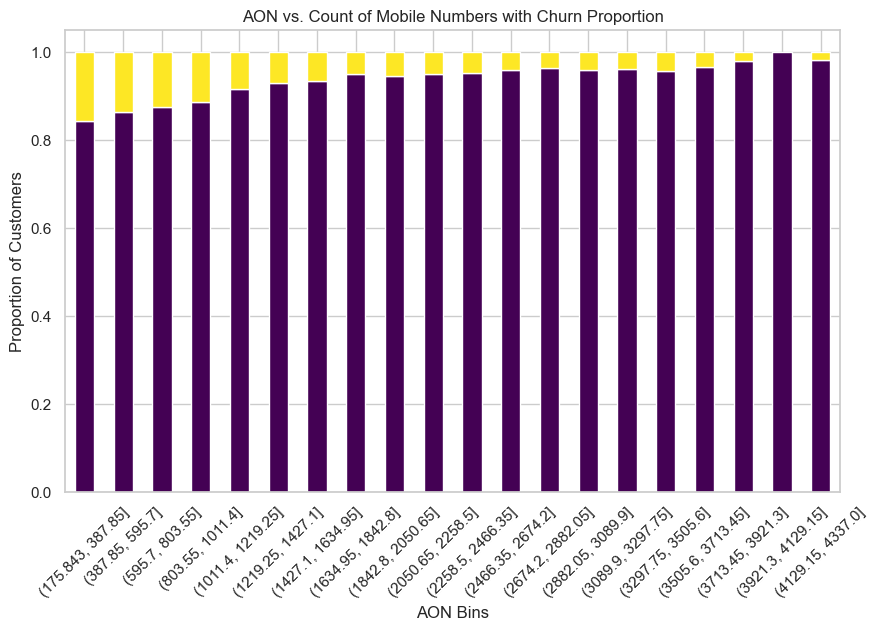

In [293]:
hv['aon'] = pd.to_numeric(hv['aon'], errors='coerce')

bins = pd.cut(hv['aon'], bins=20)
df_counts = hv.groupby([bins, 'churn'])['mobile_number'].count().unstack(fill_value=0)
df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0)
ax = df_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('AON vs. Count of Mobile Numbers with Churn Proportion')
plt.xlabel('AON Bins')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45)

ax.legend().set_visible(False)

plt.savefig('chart_aon.jpg', format='jpg', dpi=900)
plt.show()

In [294]:
df_proportions

churn,0,1
aon,,
"(175.843, 387.85]",0.842603,0.157397
"(387.85, 595.7]",0.863916,0.136084
"(595.7, 803.55]",0.873853,0.126147
"(803.55, 1011.4]",0.886146,0.113854
"(1011.4, 1219.25]",0.915209,0.084791
"(1219.25, 1427.1]",0.928715,0.071285
"(1427.1, 1634.95]",0.933316,0.066684
"(1634.95, 1842.8]",0.948447,0.051553
"(1842.8, 2050.65]",0.944358,0.055642


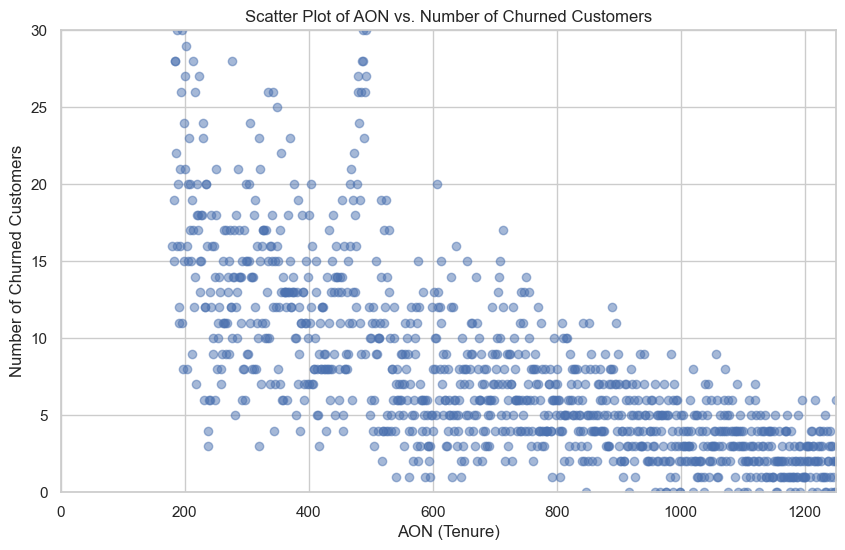

In [283]:
df = hv[['aon', 'churn']]

churn_counts = df.groupby('aon')['churn'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(churn_counts['aon'], churn_counts['churn'], alpha=0.5)
plt.title('Scatter Plot of AON vs. Number of Churned Customers')
plt.xlabel('AON (Tenure)')
plt.ylabel('Number of Churned Customers')
plt.grid(True)

plt.ylim(0, 30)  
plt.xlim(0, 1250)  


plt.show()

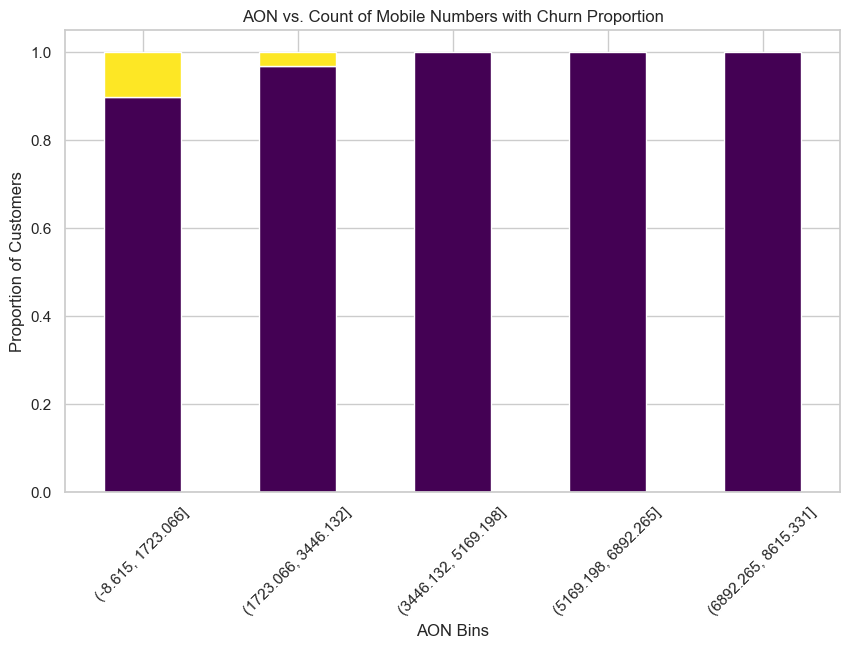

In [296]:
hv['average_frequency'] = pd.to_numeric(hv['average_frequency'], errors='coerce')

bins = pd.cut(hv['average_frequency'], bins=5)
df_counts = hv.groupby([bins, 'churn'])['mobile_number'].count().unstack(fill_value=0)

df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0)

ax = df_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('AON vs. Count of Mobile Numbers with Churn Proportion')
plt.xlabel('AON Bins')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45)

ax.legend().set_visible(False)

plt.savefig('chart_average_frequency.jpg', format='jpg', dpi=900)
plt.show()

In [297]:
df_proportions

churn,0,1
average_frequency,,
"(-8.615, 1723.066]",0.898018,0.101982
"(1723.066, 3446.132]",0.966667,0.033333
"(3446.132, 5169.198]",1.000000,0.000000
"(5169.198, 6892.265]",1.000000,0.000000
"(6892.265, 8615.331]",1.000000,0.000000


In [2]:
import seaborn as sns

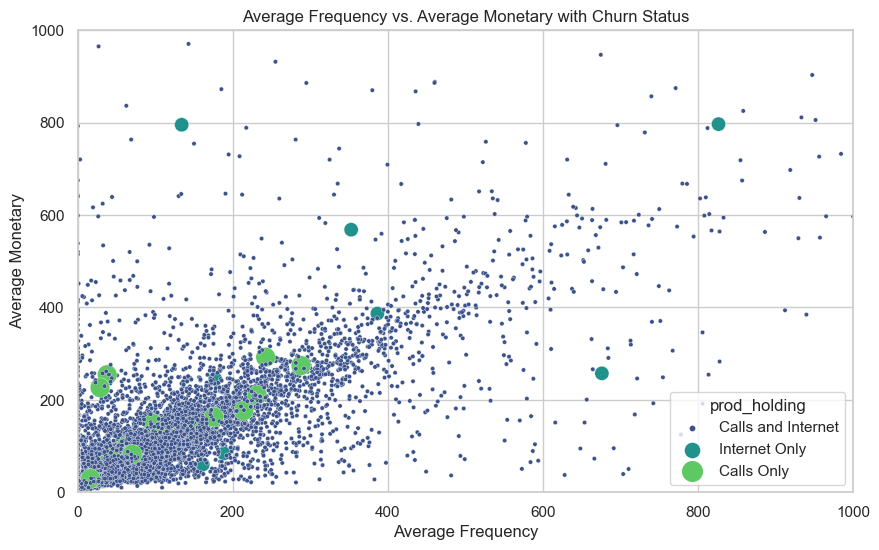

In [263]:
target['average_frequency'] = pd.to_numeric(target['average_frequency'], errors='coerce')
target['average_monetary'] = pd.to_numeric(target['average_monetary'], errors='coerce')

size_order = target['prod_holding'].unique()[::-1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_frequency', y='average_monetary', hue='prod_holding', size='prod_holding', sizes=(10, 200), size_order=size_order, data=target, palette='viridis', legend=True, color='purple')

plt.xlim(0, 1000)
plt.ylim(0, 1000)

plt.title('Average Frequency vs. Average Monetary with Churn Status')
plt.xlabel('Average Frequency')
plt.ylabel('Average Monetary')
plt.savefig('freq_money_churn_scatter.jpg', format='jpg', dpi=900)

plt.show()

# make customer clustering

In [119]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"mobile_number" : ["count"]})
grouped

,cluster,mobile_number
,,count
0,A,20000
1,B,20000
2,C,19999
3,D,20000
4,E,20000


In [120]:
grouped_aon = hv.groupby(['cluster'], as_index=False).agg({'aon': ['mean']})
grouped_aon.columns = ['cluster', 'aon_mean']
grouped_aon

,cluster,aon_mean
0,A,1748.543200
1,B,1220.561150
2,C,1200.660383
3,D,1245.347400
4,E,684.160650


In [121]:
grouped_days_gap_last_rech_calls = hv.groupby(['cluster'], as_index=False).agg({'days_gap_last_rech_calls': ['mean']})
grouped_days_gap_last_rech_calls.columns = ['cluster', 'days_gap_last_rech_calls_mean']
grouped_days_gap_last_rech_calls

,cluster,days_gap_last_rech_calls_mean
0,A,4.868700
1,B,5.061200
2,C,6.010551
3,D,8.864250
4,E,16.083800


In [122]:
grouped_days_gap_last_rech_inet = hv.groupby(['cluster'], as_index=False).agg({'days_gap_last_rech_inet': ['mean']})
grouped_days_gap_last_rech_inet.columns = ['cluster', 'days_gap_last_rech_inet_mean']
grouped_days_gap_last_rech_inet

,cluster,days_gap_last_rech_inet_mean
0,A,25.76060
1,B,68.33625
2,C,98.79084
3,D,115.88680
4,E,121.44745


In [123]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"month_gap_latest_inet" : ["mean"]})
grouped

,cluster,month_gap_latest_inet
,,mean
0,A,2.334000
1,B,3.208200
2,C,3.720536
3,D,3.945650
4,E,3.994050


In [124]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"month_gap_latest_og_calls" : ["mean"]})
grouped

,cluster,month_gap_latest_og_calls
,,mean
0,A,1.086450
1,B,1.149050
2,C,1.152958
3,D,1.163450
4,E,1.435900


In [125]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"month_gap_latest_ic_calls" : ["mean"]})
grouped

,cluster,month_gap_latest_ic_calls
,,mean
0,A,1.044000
1,B,1.091250
2,C,1.111156
3,D,1.147300
4,E,1.424400


In [126]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"total_og_mou" : ["mean"]})
grouped

,cluster,total_og_mou
,,mean
0,A,500.393365
1,B,403.314871
2,C,313.415216
3,D,193.881755
4,E,121.468659


In [127]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"total_ic_mou" : ["mean"]})
grouped

,cluster,total_ic_mou
,,mean
0,A,324.858471
1,B,230.988130
2,C,192.207806
3,D,157.252146
4,E,97.582820


In [128]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"vol_2g_mb" : ["mean"]})
grouped

,cluster,vol_2g_mb
,,mean
0,A,148.183447
1,B,77.188085
2,C,25.384584
3,D,4.210218
4,E,0.540793


In [129]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"vol_3g_mb" : ["mean"]})
grouped

,cluster,vol_3g_mb
,,mean
0,A,461.204849
1,B,147.163446
2,C,29.545090
3,D,4.190535
4,E,0.895719


In [130]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"avg_arpu_calls" : ["mean"]})
grouped

,cluster,avg_arpu_calls
,,mean
0,A,508.111679
1,B,349.225976
2,C,256.488029
3,D,170.017166
4,E,117.287193


In [131]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"avg_arpu_inet" : ["mean"]})
grouped

,cluster,avg_arpu_inet
,,mean
0,A,83.049422
1,B,23.745832
2,C,5.228827
3,D,1.045078
4,E,0.186758


In [132]:
grouped = target.groupby(['cluster'], as_index =False).agg({"mobile_number" : ["count"]})
grouped

,cluster,mobile_number
,,count
0,A,525
1,B,1093
2,C,1566
3,D,2122
4,E,4885


In [133]:
hv['avg_cost'] = (hv['aug_vbc_3g'] + hv['jul_vbc_3g'] + hv['jun_vbc_3g'])/3
hv['cost_to_revenue'] = hv['avg_cost'] / (hv['avg_arpu_inet'] + hv['avg_arpu_calls'])

In [134]:
grouped = hv.groupby(['cluster'], as_index =False).agg({"avg_cost" : ["mean"]})
grouped

,cluster,avg_cost
,,mean
0,A,216.304295
1,B,76.876492
2,C,20.960918
3,D,6.403260
4,E,4.503688


In [185]:
cluster_a = hv.loc[hv['cluster'] == 'A']
cluster_a_churn = cluster_a.loc[cluster_a['churn'] == 1]
cluster_a_nonchurn = cluster_a.loc[cluster_a['churn'] == 0]
cluster_a.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [142]:
# cluster_a_churn['total_mou_calls_6']

In [202]:
cluster_a_churn['total_mou_calls_6'] = cluster_a_churn['total_og_mou_6'] + cluster_a_churn['total_ic_mou_6']
cluster_a_churn['total_mou_calls_7'] = cluster_a_churn['total_og_mou_7'] + cluster_a_churn['total_ic_mou_7']
cluster_a_churn['total_mou_calls_8'] = cluster_a_churn['total_og_mou_8'] + cluster_a_churn['total_ic_mou_8']

cluster_a_churn['total_mou_calls_6'].fillna(0, inplace=True)
cluster_a_churn['total_mou_calls_7'].fillna(0, inplace=True)
cluster_a_churn['total_mou_calls_8'].fillna(0, inplace=True)

cluster_a_churn = cluster_a_churn.loc[cluster_a_churn['total_mou_calls_6'] > 0]

cluster_a_churn['percent_deviation_6_to_7'] = ((cluster_a_churn['total_mou_calls_7'] - cluster_a_churn['total_mou_calls_6']) / cluster_a_churn['total_mou_calls_6']) * 100
cluster_a_churn['percent_deviation_7_to_8'] = ((cluster_a_churn['total_mou_calls_8'] - cluster_a_churn['total_mou_calls_7']) / cluster_a_churn['total_mou_calls_7']) * 100
cluster_a_churn['percent_deviation_7_to_8'] = cluster_a_churn['percent_deviation_7_to_8'].replace([np.inf, -np.inf], 100)

cluster_a_churn['percent_deviation_6_to_8'] = ((cluster_a_churn['total_mou_calls_8'] - cluster_a_churn['total_mou_calls_6']) / cluster_a_churn['total_mou_calls_6']) * 100

cluster_a_churn['average_calls_deviation'] = cluster_a_churn[['percent_deviation_6_to_7','percent_deviation_7_to_8']].mean(axis=1)
# cluster_a_churn['percent_deviation_6_to_8'].unique()
cluster_a_churn[['percent_deviation_6_to_8']].to_excel("cluster_a_churn.xlsx")

In [162]:
cluster_a_churn['total_vol_inet_6'] = cluster_a_churn['vol_2g_mb_6'] + cluster_a_churn['vol_3g_mb_6']
cluster_a_churn['total_vol_inet_7'] = cluster_a_churn['vol_2g_mb_7'] + cluster_a_churn['vol_3g_mb_7']
cluster_a_churn['total_vol_inet_8'] = cluster_a_churn['vol_2g_mb_8'] + cluster_a_churn['vol_3g_mb_8']

cluster_a_churn['total_vol_inet_6'].fillna(0, inplace=True)
cluster_a_churn['total_vol_inet_7'].fillna(0, inplace=True)
cluster_a_churn['total_vol_inet_8'].fillna(0, inplace=True)

cluster_a_churn = cluster_a_churn.loc[cluster_a_churn['total_vol_inet_6'] > 0]

cluster_a_churn['percent_deviation_6_to_7_inet'] = ((cluster_a_churn['total_vol_inet_7'] - cluster_a_churn['total_vol_inet_6']) / cluster_a_churn['total_vol_inet_6']) * 100
cluster_a_churn['percent_deviation_7_to_8_inet'] = ((cluster_a_churn['total_vol_inet_8'] - cluster_a_churn['total_vol_inet_7']) / cluster_a_churn['total_vol_inet_7']) * 100
cluster_a_churn['percent_deviation_7_to_8_inet'] = cluster_a_churn['percent_deviation_7_to_8_inet'].replace([np.inf, -np.inf], 100)

cluster_a_churn['percent_deviation_6_to_8_inet'] = ((cluster_a_churn['total_vol_inet_8'] - cluster_a_churn['total_vol_inet_6']) / cluster_a_churn['total_vol_inet_6']) * 100

cluster_a_churn['average_calls_deviation_inet'] = cluster_a_churn[['percent_deviation_6_to_7_inet','percent_deviation_7_to_8_inet']].mean(axis=1)
# cluster_a_churn['percent_deviation_6_to_8'].unique()
cluster_a_churn[['percent_deviation_6_to_8_inet']].to_excel("cluster_a_churn_inet.xlsx")

In [164]:
cluster_a_churn['arpu_6'].fillna(0, inplace=True)
cluster_a_churn['arpu_7'].fillna(0, inplace=True)
cluster_a_churn['arpu_8'].fillna(0, inplace=True)

cluster_a_churn = cluster_a_churn.loc[cluster_a_churn['arpu_6'] > 0]

cluster_a_churn['percent_deviation_6_to_8_arpu'] = ((cluster_a_churn['arpu_8'] - cluster_a_churn['arpu_6']) / cluster_a_churn['arpu_6']) * 100

cluster_a_churn[['percent_deviation_6_to_8_arpu']].to_excel("cluster_a_churn_arpu.xlsx")

In [165]:
cluster_a_churn['arpu_inet_6'] = cluster_a_churn['arpu_2g_6'] + cluster_a_churn['arpu_3g_6']
cluster_a_churn['arpu_inet_7'] = cluster_a_churn['arpu_2g_7'] + cluster_a_churn['arpu_3g_7']
cluster_a_churn['arpu_inet_8'] = cluster_a_churn['arpu_2g_8'] + cluster_a_churn['arpu_3g_8']

cluster_a_churn['arpu_inet_6'].fillna(0, inplace=True)
cluster_a_churn['arpu_inet_7'].fillna(0, inplace=True)
cluster_a_churn['arpu_inet_8'].fillna(0, inplace=True)

cluster_a_churn = cluster_a_churn.loc[cluster_a_churn['arpu_inet_6'] > 0]

cluster_a_churn['percent_deviation_6_to_8_arpu_inet'] = ((cluster_a_churn['arpu_inet_8'] - cluster_a_churn['arpu_inet_6']) / cluster_a_churn['arpu_inet_6']) * 100

cluster_a_churn[['percent_deviation_6_to_8_arpu_inet']].to_excel("cluster_a_churn_arpu_inet.xlsx")

In [180]:
cluster_a_churn['total_mou_roam_calls_6'] = cluster_a_churn['roam_og_mou_6'] + cluster_a_churn['roam_ic_mou_6']
cluster_a_churn['total_mou_roam_calls_7'] = cluster_a_churn['roam_og_mou_7'] + cluster_a_churn['roam_ic_mou_7']
cluster_a_churn['total_mou_roam_calls_8'] = cluster_a_churn['roam_og_mou_8'] + cluster_a_churn['roam_ic_mou_8']

# cluster_a_churn = cluster_a_churn.loc[cluster_a_churn['total_mou_roam_calls_8'] > 0]

cluster_a_churn['total_mou_roam_calls_6'].fillna(0, inplace=True)
cluster_a_churn['total_mou_roam_calls_7'].fillna(0, inplace=True)
cluster_a_churn['total_mou_roam_calls_8'].fillna(0, inplace=True)

cluster_a_churn['percent_deviation_6_to_8_roam'] = ((cluster_a_churn['total_mou_roam_calls_8'] - cluster_a_churn['total_mou_roam_calls_6']) / cluster_a_churn['total_mou_roam_calls_6']) * 100
cluster_a_churn[['percent_deviation_6_to_8_roam']].to_excel("cluster_a_churn_roam.xlsx")

In [176]:
cluster_a_churn['offnet_mou_6'].fillna(0, inplace=True)
cluster_a_churn['offnet_mou_7'].fillna(0, inplace=True)
cluster_a_churn['offnet_mou_8'].fillna(0, inplace=True)

cluster_a_churn = cluster_a_churn.loc[cluster_a_churn['offnet_mou_8'] > 0]

cluster_a_churn['percent_deviation_6_to_8_offnet'] = ((cluster_a_churn['offnet_mou_8'] - cluster_a_churn['offnet_mou_6']) / cluster_a_churn['offnet_mou_6']) * 100
cluster_a_churn[['percent_deviation_6_to_8_offnet']].to_excel("cluster_a_churn_offnet.xlsx")

In [188]:
# cluster_a_churn['total_mou_t2c_calls_6'].head(2)

In [189]:
cluster_a_churn['loc_og_t2c_mou_6'].fillna(0, inplace=True)
cluster_a_churn['loc_og_t2c_mou_7'].fillna(0, inplace=True)
cluster_a_churn['loc_og_t2c_mou_8'].fillna(0, inplace=True)

# cluster_a_churn['percent_deviation_6_to_8_t2c'] = ((cluster_a_churn['total_mou_t2c_calls_8'] - cluster_a_churn['total_mou_t2c_calls_6']) / cluster_a_churn['total_mou_t2c_calls_6']) * 100
cluster_a_churn[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].to_excel("cluster_a_churn_t2c.xlsx")

In [ ]:
cluster_a_churn['loc_og_t2c_mou_6'].fillna(0, inplace=True)
cluster_a_churn['loc_og_t2c_mou_7'].fillna(0, inplace=True)
cluster_a_churn['loc_og_t2c_mou_8'].fillna(0, inplace=True)

# cluster_a_churn['percent_deviation_6_to_8_t2c'] = ((cluster_a_churn['total_mou_t2c_calls_8'] - cluster_a_churn['total_mou_t2c_calls_6']) / cluster_a_churn['total_mou_t2c_calls_6']) * 100
cluster_a_churn[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].to_excel("cluster_a_churn_t2c.xlsx")

In [192]:
cluster_a_nonchurn['loc_og_t2c_mou_6'].fillna(0, inplace=True)
cluster_a_nonchurn['loc_og_t2c_mou_7'].fillna(0, inplace=True)
cluster_a_nonchurn['loc_og_t2c_mou_8'].fillna(0, inplace=True)

# cluster_a_nonchurn['percent_deviation_6_to_8_t2c'] = ((cluster_a_nonchurn['total_mou_t2c_calls_8'] - cluster_a_nonchurn['total_mou_t2c_calls_6']) / cluster_a_nonchurn['total_mou_t2c_calls_6']) * 100
cluster_a_nonchurn[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].to_excel("cluster_a_nonchurn_t2c.xlsx")

In [216]:
cluster_e = hv.loc[hv['cluster'] == 'E']
cluster_e_churn = cluster_e.loc[cluster_e['churn'] == 1]
cluster_e_nonchurn = cluster_e.loc[cluster_e['churn'] == 0]
cluster_e.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,prod_holding,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,total_ic_og_mou_9,vol_2g_3g_mb_9,churn,aon_years,most_recent_date_calls,days_gap_last_rech_calls,most_recent_date_inet,days_gap_last_rech_inet,latest_month_og_calls,month_gap_latest_og_calls,latest_month_ic_calls,month_gap_latest_ic_calls,latest_month_inet_2g,latest_month_inet_3g,latest_month_inet,month_gap_latest_inet,total_og_mou,total_ic_mou,vol_2g_mb,vol_3g_mb,avg_arpu_calls,avg_arpu_inet,days_gap_last_rech_calls_raw,days_gap_last_rech_inet_raw,month_gap_latest_inet_raw,month_gap_latest_og_calls_

In [204]:
cluster_e_churn['total_mou_calls_6'] = cluster_e_churn['total_og_mou_6'] + cluster_e_churn['total_ic_mou_6']
cluster_e_churn['total_mou_calls_7'] = cluster_e_churn['total_og_mou_7'] + cluster_e_churn['total_ic_mou_7']
cluster_e_churn['total_mou_calls_8'] = cluster_e_churn['total_og_mou_8'] + cluster_e_churn['total_ic_mou_8']

cluster_e_churn['total_mou_calls_6'].fillna(0, inplace=True)
cluster_e_churn['total_mou_calls_7'].fillna(0, inplace=True)
cluster_e_churn['total_mou_calls_8'].fillna(0, inplace=True)

cluster_e_churn['average_calls_mou'] = cluster_e_churn[['total_mou_calls_6','total_mou_calls_7','total_mou_calls_8']].mean(axis=1)
# cluster_e_churn['percent_deviation_6_to_8'].unique()
# cluster_e_churn[['percent_deviation_6_to_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].to_excel("cluster_e_churn.xlsx")
cluster_e_churn['average_calls_mou'].mean()

167.12328147389937

In [215]:
cluster_e_churn['total_vol_inet_6'] = cluster_e_churn['vol_2g_mb_6'] + cluster_e_churn['vol_3g_mb_6']
cluster_e_churn['total_vol_inet_7'] = cluster_e_churn['vol_2g_mb_7'] + cluster_e_churn['vol_3g_mb_7']
cluster_e_churn['total_vol_inet_8'] = cluster_e_churn['vol_2g_mb_8'] + cluster_e_churn['vol_3g_mb_8']

cluster_e_churn['total_vol_inet_6'].fillna(0, inplace=True)
cluster_e_churn['total_vol_inet_7'].fillna(0, inplace=True)
cluster_e_churn['total_vol_inet_8'].fillna(0, inplace=True)

cluster_e_churn['average_vol_inet'] = cluster_e_churn[['total_vol_inet_6']].mean(axis=1)
# cluster_e_churn['percent_deviation_6_to_8'].unique()
cluster_e_churn['average_vol_inet'].mean()
# Q1 = cluster_e_churn['average_vol_inet'].quantile(0.50)
# print("First Quartile (Q1):", Q1)

13.088718526100314

In [ ]:
cluster_e_churn.to_excel()

In [218]:
cluster_e_churn[['aon']].to_excel("cluster_e_churn_cust.xlsx")
# cluster_e_nonchurn[['aon']].to_excel("cluster_e_nonchurn.xlsx")

In [198]:
grouped = cluster_e_churn.groupby(["prod_holding"]).agg({"mobile_number": "count"})
total_count = grouped["mobile_number"].sum()
grouped["percentage"] = (grouped["mobile_number"] / total_count) * 100
grouped.reset_index(inplace=True)
grouped.sort_values(by="percentage", ascending=False, inplace=True)
grouped

,prod_holding,mobile_number,percentage
1,Calls and Internet,4866,99.611054
0,Calls Only,19,0.388946
